In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
!pip install 'h5py==2.10.0' --force-reinstall
import numpy as np
import os
import tensorflow as tf
from tensorflow.python.saved_model.load import metrics
import chardet
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

print(tf.__version__)

2.15.0


ERROR: Invalid requirement: "'h5py==2.10.0'"


In [6]:
dir = os.getcwd()
print(dir)

with open("./lotto.csv", 'rb') as f:
    rawdata = f.read()
    result = chardet.detect(rawdata)
    encoding = result['encoding']
#rows = pd.read_csv("./lotto.csv", encoding='utf-8')
rows = np.genfromtxt("./lotto.csv", delimiter=",", dtype='str', encoding='UTF8')
#rows = np.loadtxt("./lotto.csv", delimiter=",", encoding='UTF8')
                  
row_count = len(rows)
print(row_count)

c:\Git\LSTM_lotto_Deeplearning\LSTM_lotto_Deeplearning
1114


In [7]:
def numbers2ohbin(numbers):
    ohbin = np.zeros(45) 
    for i in range(6): 
        ohbin[int(numbers[i]) - 1] = 1 
        
    return ohbin

def ohbin2numbers(ohbin):
    numbers = []
    for i in range(len(ohbin)):
        if ohbin[i] == 1.0:
            numbers.append(i+1)
        
    return numbers

numbers = rows[:, 1:7]
ohbins = list(map(numbers2ohbin, numbers))

x_samples = ohbins[0:row_count - 1]
y_samples = ohbins[1:row_count]

print("ohbins")
print ("X[0]: " + str(x_samples[0]))
print ("Y[0]: " + str(y_samples[0]))

print("numbers")
print("X[0]: " + str(ohbin2numbers(x_samples[0])))
print("Y[0]: " + str(ohbin2numbers(y_samples[0])))

train_idx = (0, 800)
val_idx = (801, 900)
test_idx = (901, len(x_samples))

print("train : {0}, val : {1}, test : {2}".format(train_idx,val_idx,test_idx))


ohbins
X[0]: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
Y[0]: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
numbers
X[0]: [10, 23, 29, 33, 37, 40]
Y[0]: [9, 13, 21, 25, 32, 42]
train : (0, 800), val : (801, 900), test : (901, 1113)


In [14]:
#####################################################################################
# 모델 생성 및 학습
#####################################################################################

model = keras.Sequential([
    keras.layers.LSTM(128, batch_input_shape=(1, 1, 45), return_sequences=False, stateful=True),
    keras.layers.Dense(45, activation='sigmoid')
])

# 모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
     

train_loss = []
train_acc = []
val_loss = []
val_acc = []

In [19]:
# 최대 100번 epochs까지 수행하도록.
for epoch in range(300):
    model.reset_states() # 중요! 매 에포크마다 1회부터 다시 훈련하므로 상태 초기화 필요

    batch_train_loss = []
    batch_train_acc = []
    
    for i in range(train_idx[0], train_idx[1]):
        
        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.train_on_batch(xs, ys) #배치만큼 모델에 학습시킴

        batch_train_loss.append(loss)
        batch_train_acc.append(acc)

    train_loss.append(np.mean(batch_train_loss))
    train_acc.append(np.mean(batch_train_acc))

    batch_val_loss = []
    batch_val_acc = []

    for i in range(val_idx[0], val_idx[1]):

        xs = x_samples[i].reshape(1, 1, 45)
        ys = y_samples[i].reshape(1, 45)
        
        loss, acc = model.test_on_batch(xs, ys) #배치만큼 모델에 입력하여 나온 답을 정답과 비교함
        
        batch_val_loss.append(loss)
        batch_val_acc.append(acc)

    val_loss.append(np.mean(batch_val_loss))
    val_acc.append(np.mean(batch_val_acc))
    
    print('epoch {0:4d} train acc {1:0.3f} loss {2:0.3f} val acc {3:0.3f} loss {4:0.3f}'.format(epoch, np.mean(batch_train_acc), np.mean(batch_train_loss), np.mean(batch_val_acc), np.mean(batch_val_loss)))
     

epoch    0 train acc 0.120 loss 0.172 val acc 0.030 loss 0.582
epoch    1 train acc 0.117 loss 0.157 val acc 0.030 loss 0.595
epoch    2 train acc 0.141 loss 0.148 val acc 0.030 loss 0.604
epoch    3 train acc 0.130 loss 0.141 val acc 0.030 loss 0.613
epoch    4 train acc 0.142 loss 0.136 val acc 0.020 loss 0.624
epoch    5 train acc 0.152 loss 0.128 val acc 0.030 loss 0.635
epoch    6 train acc 0.154 loss 0.123 val acc 0.010 loss 0.647
epoch    7 train acc 0.150 loss 0.117 val acc 0.020 loss 0.663
epoch    8 train acc 0.130 loss 0.113 val acc 0.051 loss 0.666
epoch    9 train acc 0.152 loss 0.108 val acc 0.030 loss 0.686
epoch   10 train acc 0.158 loss 0.103 val acc 0.010 loss 0.694
epoch   11 train acc 0.147 loss 0.098 val acc 0.030 loss 0.697
epoch   12 train acc 0.171 loss 0.094 val acc 0.020 loss 0.718
epoch   13 train acc 0.154 loss 0.089 val acc 0.010 loss 0.725
epoch   14 train acc 0.142 loss 0.087 val acc 0.010 loss 0.739
epoch   15 train acc 0.147 loss 0.079 val acc 0.010 los

KeyboardInterrupt: 

TypeError: cannot unpack non-iterable Axes object

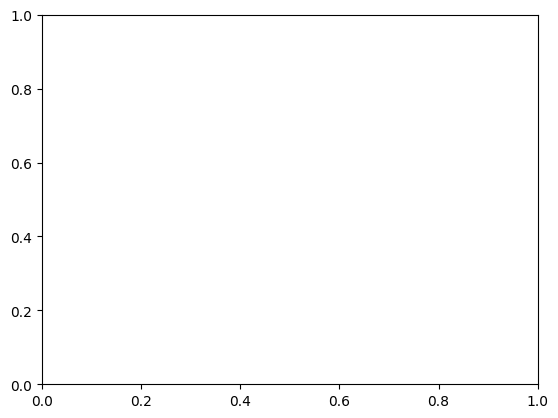

In [21]:
# 시각화작업

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplot()

acc_ax = loss_ax.twinx()

loss_ax.plot(train_loss, 'y', label='train loss')
loss_ax.plot(val_loss, 'r', label='val loss')

acc_ax.plot(train_acc, 'b', label='train acc')
acc_ax.plot(val_acc, 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [22]:
# 88회부터 지금까지 1등부터 5등까지 상금의 평균낸다.
mean_price = [np.mean(rows[87:, 8]),
           np.mean(rows[87:, 9]),
           np.mean(rows[87:, 10]),
           np.mean(rows[87:, 11]),
           np.mean(rows[87:, 12])]

print(mean_price) 

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U12'), dtype('<U12')) -> None